## Lesson 2 Assignment
### Author: Dustin Burnham
### Due: July 21st, 2019

You are involved in a project where you are tasked to build a machine learning algorithm that distinguishes between "bad'' connections (called intrusions or attacks) and "good'' (normal) connections. Note that the number of normal connections is greater than that of bad ones.

#### This Notebook will do the following:
1. Read data
2. Build a classifier
3. Determine your model accuracy
4. Modify data by handling class imbalance
5. Use the same mode on updated data
6. What is the accuracy?
7. Describe your findings

### 1.  Read the data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Import data
intrusion = pd.read_csv("Intrusion Detection.csv")

##### Investigate Data

In [3]:
intrusion.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
count,97308.000000,9.730800e+04,9.730800e+04,97308.000000,97308.0,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,...,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000
mean,216.618798,1.157123e+03,3.385562e+03,0.000010,0.0,0.000031,0.045135,0.000185,0.719047,0.028990,...,202.006084,0.845039,0.056462,0.134121,0.024139,0.002121,0.001068,0.057706,0.055819,0.000308
std,1359.006741,3.422086e+04,3.757305e+04,0.003206,0.0,0.009617,0.859471,0.020775,0.449467,4.046376,...,86.965239,0.305171,0.180003,0.280997,0.049664,0.029417,0.015721,0.224963,0.218861,0.017556
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.470000e+02,1.360000e+02,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,170.000000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.310000e+02,4.210000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.130000e+02,2.124000e+03,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.010000,0.070000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,2.194619e+06,5.134218e+06,1.000000,0.0,3.000000,30.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
intrusion.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [5]:
# Remove labels related to target to prevent leakage
intrusion = intrusion.drop(['srv_serror_rate', 'srv_rerror_rate', 'srv_diff_host_rate'], axis = 1)


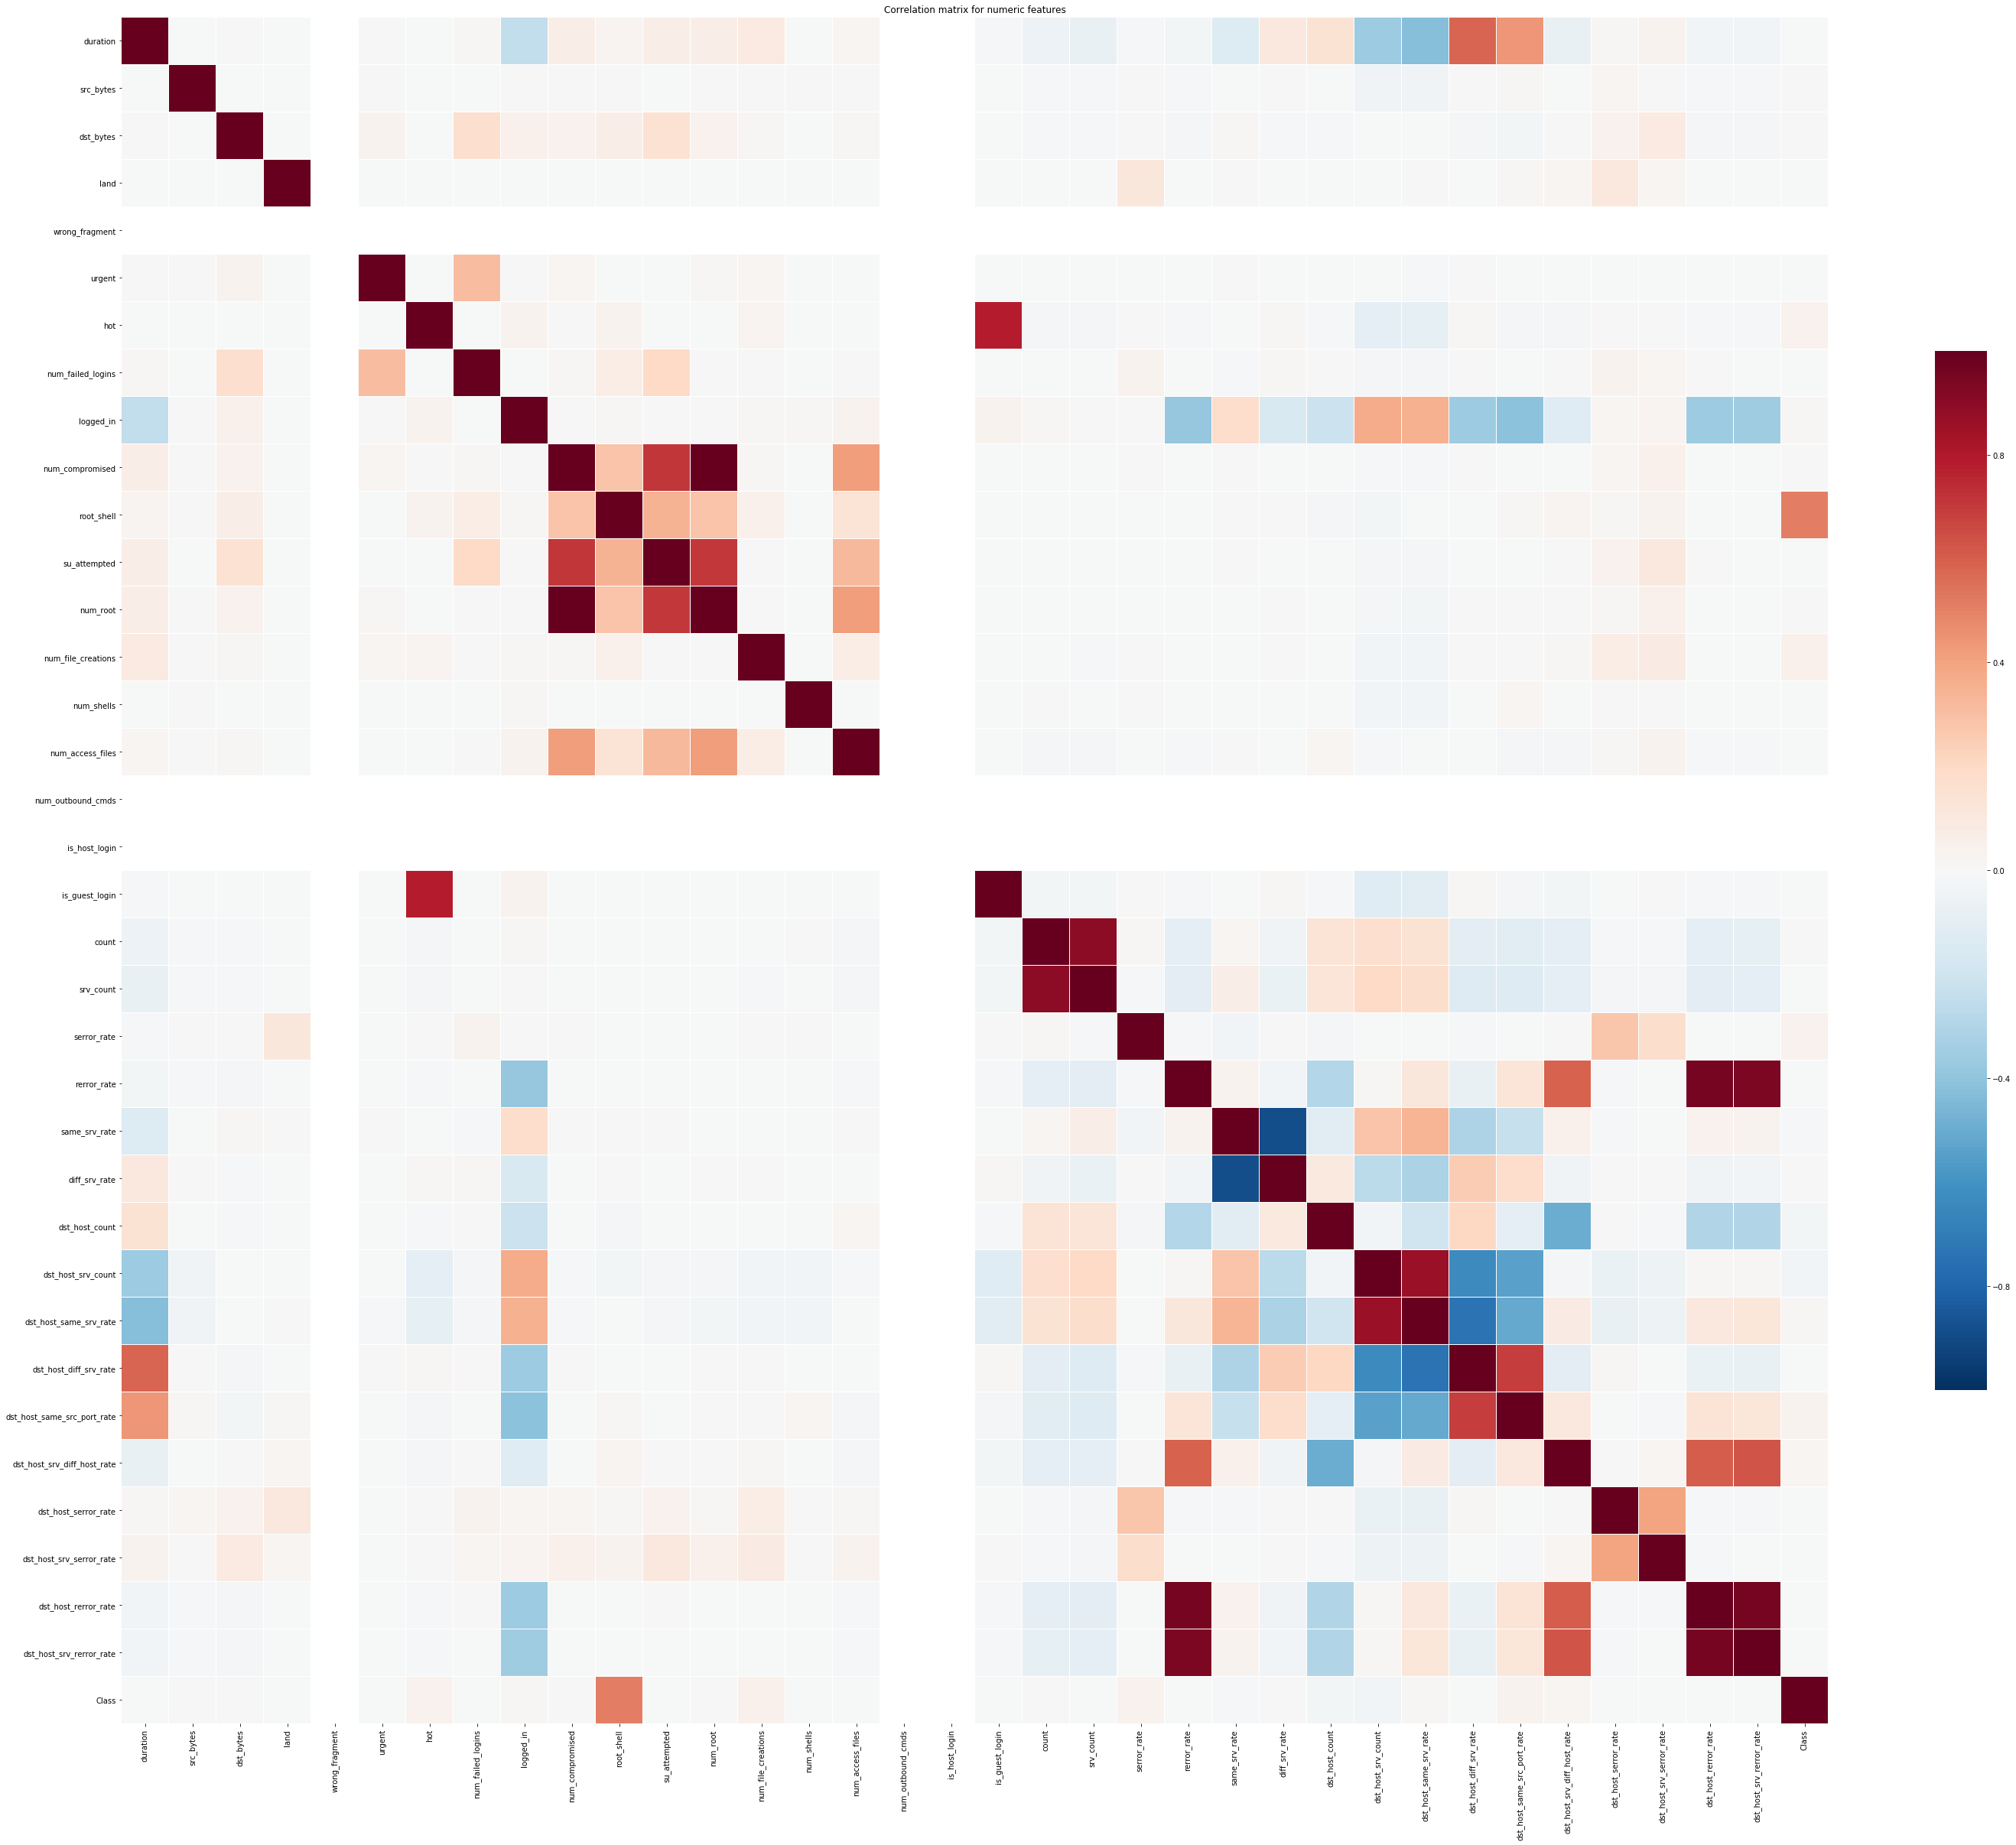

In [6]:
# Calculate a correlation matrix
intrusion_corr = intrusion.corr()
# Display the correlation matrix using a heat map
plt.figure(figsize=(50,50))
sns.heatmap(intrusion.corr(), vmax=1, vmin=-1, center=0, cmap="RdBu_r",
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')
plt.show()

In [7]:
print("Good Connections: ", len(intrusion)-sum(intrusion['Class']))
print("Bad Connections: ", sum(intrusion['Class']))
print("Total: ", len(intrusion))

Good Connections:  97278
Bad Connections:  30
Total:  97308


In [8]:
intrusion = intrusion.dropna(axis=0)

In [9]:
print("Good Connections: ", len(intrusion)-sum(intrusion['Class']))
print("Bad Connections: ", sum(intrusion['Class']))
print("Total: ", len(intrusion))

Good Connections:  97278
Bad Connections:  30
Total:  97308


In [10]:
# Select numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
intrusion = intrusion.select_dtypes(include=numerics)

In [11]:
variables = intrusion[list(intrusion.columns[:-1])]
target = intrusion['Class']

Use PCA to analyze variance of variables on the target

/Users/dusty/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Text(0, 0.5, 'Explained Variance')

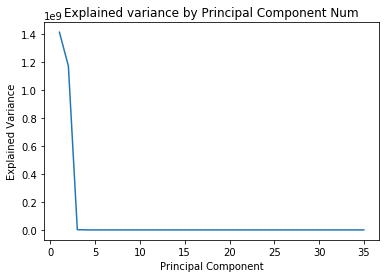

In [12]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

# Create x-scaled (look into the function np.apply_along_axis to apply 'scale' function
#    to each column).
x_scaled = np.apply_along_axis(scale, 0, variables)

# Create a scaled y-target.
y_scaled = scale(target)

# PCR!!
pca = PCA()
pca_result = pca.fit_transform(variables)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=variables.columns[:])
pca_df['Class'] = target

plt.plot([i for i in range(1,36)], pca.explained_variance_)
plt.title('Explained variance by Principal Component Num')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

In [13]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(variables, target, test_size = 0.3, random_state=42)

### 2. Build a classifier

In [14]:
print ('\n\nLogistic Regression classifier\n')
lf = LogisticRegression(random_state=42) # default parameters are fine
lf.fit(x_train, y_train)



Logistic Regression classifier



/Users/dusty/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dusty/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 3. Determine the model accuracy

In [15]:
# Probabilities
BothProbabilities = lf.predict_proba(x_test)
probabilities = BothProbabilities[:,1]

In [16]:
threshold = 0.4

# Generate predictions, confusion matrix
predictions = (probabilities > threshold).astype(int)
CM = metrics.confusion_matrix(y_test, predictions)
tn, fp, fn, tp = CM.ravel()

In [17]:
print('True Negative: ', tn)
print('False Positive: ', fp)
print('False Negative: ', fn)
print('True Positive: ', tp)

True Negative:  29180
False Positive:  2
False Negative:  10
True Positive:  1


In [18]:
AR = accuracy_score(y_test, predictions)
print("accuracy score:", AR)
precision = precision_score(y_test, predictions)
print("precision:", precision)
recall = recall_score(y_test, predictions)
print("recall:", recall)
f1 = f1_score(y_test, predictions)
print("f1 score:", f1)

accuracy score: 0.999588942554722
precision: 0.3333333333333333
recall: 0.09090909090909091
f1 score: 0.14285714285714288


Area Under Curve: 0.9988691659241998


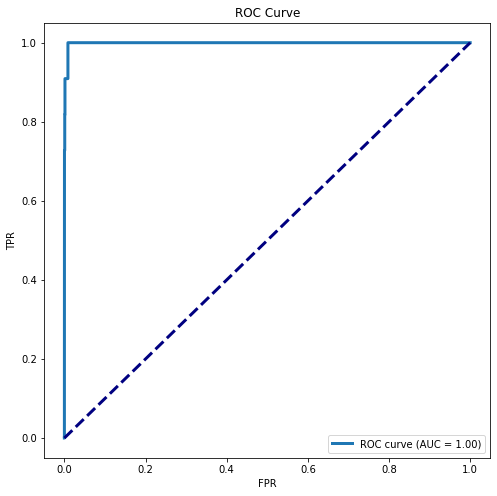

In [19]:
# Generate True Positive Rate, Fale Positive Rate
fpr, tpr, th = roc_curve(y_test, probabilities)

# Generate Area Under the ROC Curve
AUC = auc(fpr, tpr)
print("Area Under Curve:", AUC)

# Generate ROC Plot
plt.rcParams["figure.figsize"] = [8, 8] # Square
plt.figure()
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

### 4.  Modify data by handling class imbalance

In [20]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_sample(variables, target)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 97278, 1: 97278})


### 5.  Use the same mode on updated data

In [21]:
print ('\n\nLogistic Regression classifier\n')
lf = LogisticRegression(random_state=42) # default parameters are fine
lf.fit(x_res, y_res)



Logistic Regression classifier



/Users/dusty/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dusty/anaconda3/envs/uwdatasci420/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 6. What is the accuracy?

In [22]:
BothProbabilities = lf.predict_proba(x_test)
probabilities = BothProbabilities[:,1]

In [23]:
threshold = 0.4

# Generate predictions, confusion matrix
predictions = (probabilities > threshold).astype(int)
CM = metrics.confusion_matrix(y_test, predictions)
tn, fp, fn, tp = CM.ravel()

In [24]:
print('True Negative: ', tn)
print('False Positive: ', fp)
print('False Negative: ', fn)
print('True Positive: ', tp)

True Negative:  28802
False Positive:  380
False Negative:  0
True Positive:  11


In [25]:
AR = accuracy_score(y_test, predictions)
print("accuracy score:", AR)
precision = precision_score(y_test, predictions)
print("precision:", precision)
recall = recall_score(y_test, predictions)
print("recall:", recall)
f1 = f1_score(y_test, predictions)
print("f1 score:", f1)

accuracy score: 0.9869831808995307
precision: 0.028132992327365727
recall: 1.0
f1 score: 0.05472636815920398


Area Under Curve: 0.9994330253394059


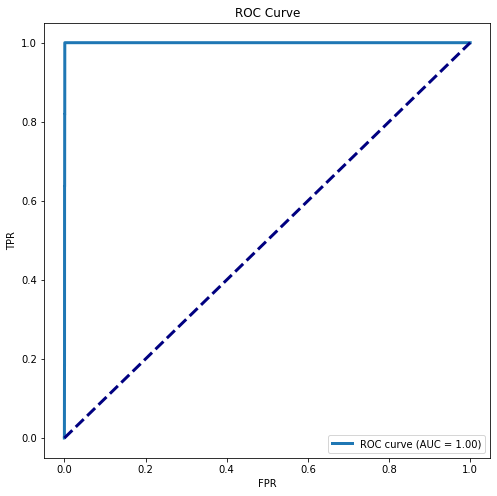

In [26]:
# Generate True Positive Rate, Fale Positive Rate
fpr, tpr, th = roc_curve(y_test, probabilities)

# Generate Area Under the ROC Curve
AUC = auc(fpr, tpr)
print("Area Under Curve:", AUC)

# Generate ROC Plot
plt.rcParams["figure.figsize"] = [8, 8] # Square
plt.figure()
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

### 7. Findings

The initial model with severe imbalance could unsurprisingly predict a good connection great, but not so much a bad connection.  This makes sense because the model is being fit to data where the vast majority of labels are good connection.  The accuracy of the model is great, very close to 1, but the recall is around 0.1.  I think recall is the best statistic when looking at how your model is doing for predicting the minority label because it is the rate of how many of those minority labels are predicted correctly.  To combat the imbalance I will use SMOTE to oversample the minority label.  Once the labels are balanced, I retrain a logistic regression model.  This model should predict the minority labels better.  Once evaluating this model on the original data, we can see that the accuracy remains high, but now the recall measure is 1.  All of the bad connections are now identified, while only seeing a slight dip in overall accuracy.  I do have my reservations, as looking a statistics like the AUC, precision, and f1 statistic are not favorable in either model.  In fact I suggest target leakage, despite removing variables similar to the class of bad or good connection.  All in all, I was able to increase the recall of the algorithm by oversampling the minority and refitting the logistic regression model.